# PROJETO 1

## <font color='red'>Paulo Tozzo Ponciano</font>

## <font color='blue'>Diferença entre os aposentados</font>

## Introdução

nesse projeto iremos apresentar as diferenças entre os aposentas masculinos e os femininos,principalmente as diferenças economicas,focando nas razoes porque elas são diferentes.


___
## Análise e Resultados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib import pyplot

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Paulo\Documents\GitHub\CD\Projeto 1


In [3]:
dados = pd.read_csv("PES2014.csv", sep=",")

In [4]:
dados.aposentados = dados.V9122.astype('category') #2 sim, 4 não
dados.sexo = dados.V0302.astype('category') #2 mas, 4 fem
dados.curso = dados.V6007.astype('category')
dados.idade = dados.V8005.astype('float')
dados.anos_estudo = dados.V4803.astype('float')
dados.sabe_ler_escrever = dados.V0601.astype('category') #Sabe ler e escrever


dados.renda = dados.V1022.astype('float')
dados.renda = dados.renda[dados.renda < 500000]


In [5]:
dados.renda.mas = dados.renda[dados.sexo == 2]
dados.renda.fem = dados.renda[dados.sexo == 4]


faixa_r =  np.arange(0,6000,100)

variável_renda_mas= pd.cut(dados.renda.mas, faixa_r)
variável_renda_fem= pd.cut(dados.renda.fem, faixa_r)

x = variável_renda_mas.value_counts((True)*100).round(decimals=0)
x = variável_renda_fem.value_counts((True)*100).round(decimals=0)

In [6]:
faixa =  np.arange(10,111,10)

variável_idade= pd.cut(dados.idade[dados.aposentados == 2], faixa)

x = variável_idade.value_counts((True)*100).round(decimals=0)

Primeiro vemos que existem mais aposentados mulheres que homens, como mostra o histograma e o boxplot abaixo,porem a diferença é minima,existem 613 mulheres a mais, uma quantidade desprezivel comparada com o tamanho da PNAD

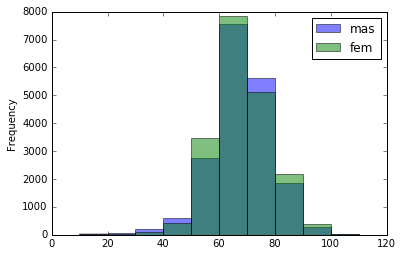

In [7]:
idade_apose = dados.idade[dados.aposentados == 2]

plot = idade_apose[dados.sexo == 2].plot.hist(bins=faixa,color = "blue",label = 'mas',alpha=0.5)
plot = idade_apose[dados.sexo == 4].plot.hist(bins=faixa,color = "green",label = 'fem',alpha=0.5)
pyplot.legend(loc='upper right')
plt.show()

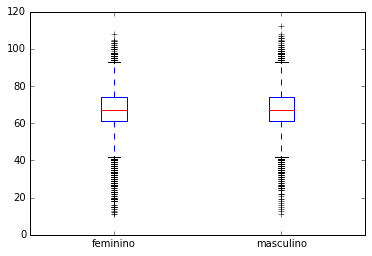

In [10]:
dados.idade_sexo = pd.DataFrame([idade_apose[dados.sexo == 2],idade_apose[dados.sexo == 4]])

dados.idade_sexo = dados.idade_sexo.T
dados.idade_sexo.columns = 'feminino','masculino'

dados.idade_sexo.plot.box()
plt.show()

Mesmo que a quantidade de homens e de mulheres sejam proximas a renda das mulheres aposentadas é menor que as dos homens, as mulheres tem uma mediana de 760 reais, enquanto os homens tem uma mediana de 1000 reais, ou seja os homens aposentados ganham mais que as mulheres aposentadas, como mostra o histograma abaixo.

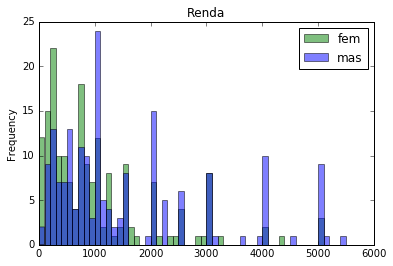

In [19]:
plot = dados.renda.fem.plot.hist(bins=faixa_r,color = "green",label = 'fem',alpha=0.5,title='Renda')
plot = dados.renda.mas.plot.hist(bins=faixa_r,color = "blue",label = 'mas',alpha=0.5)

pyplot.legend(loc='upper right')
plt.show()

In [12]:
print(dados.renda.fem.median())
print(dados.renda.mas.median())

760.0
1000.0


Alem do mais como podemos ver na tabela abaixo,e nos gráficos de setores, existem uma quantidade significativa de mulheres com um grau maior de ensino que homens, assim a diferença de salário dos homens e das mulheres não é justificada pela diferença de ensino que deveria ser o fator determinante de um salário.

In [13]:
ct = pd.crosstab(dados.curso,dados.sexo[dados.aposentados == 2],margins=True)


ct.columns = ['masculino',
'feminino',
'All']

ct.index = ['Elementar (primário)',
'Médio 1º ciclo (ginasial, etc.)',
'Médio 2º ciclo (científico, clássico, etc.)',
'Regular do ensino fundamental ou do 1º grau',
'Regular do ensino médio ou do 2º grau',
'Educação de jovens e adultos ou supletivo do ensino fundamental ou do 1º grau',
'Educação de jovens e adultos ou supletivo de ensino médio ou do 2º grau',
'Superior de graduação',
'Mestrado ou doutorado',
'Alfabetização de jovens e adultos',
'Creche',
'Classe de alfabetização - CA',
'Maternal, jardim de infância etc',
'All']

ct1 = ct.iloc[:,0:2]
ct1

,masculino,feminino
Elementar (primário),7521,7292
"Médio 1º ciclo (ginasial, etc.)",1458,1250
"Médio 2º ciclo (científico, clássico, etc.)",1038,1172
Regular do ensino fundamental ou do 1º grau,1593,1294
Regular do ensino médio ou do 2º grau,1513,1462
Educação de jovens e adultos ou supletivo do ensino fundamental ou do 1º grau,197,277
Educação de jovens e adultos ou supletivo de ensino médio ou do 2º grau,206,212
Superior de graduação,1843,2556
Mestrado ou doutorado,123,126
Alfabetização de jovens e adultos,143,168


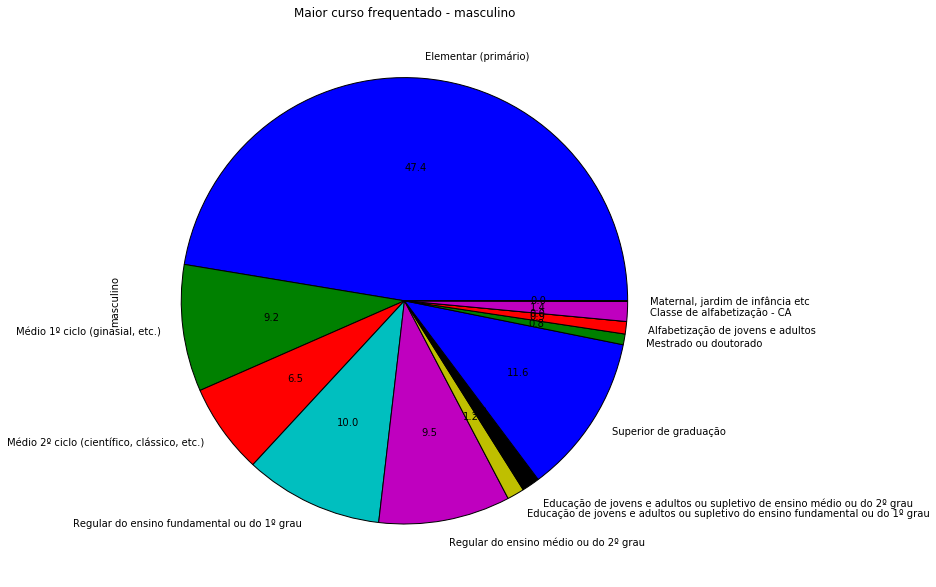

In [14]:
ct2 = ct.iloc[:13,0]

plot = ct2.plot(kind='pie',title='Maior curso frequentado - masculino',autopct='%.1f',figsize=(10, 10))

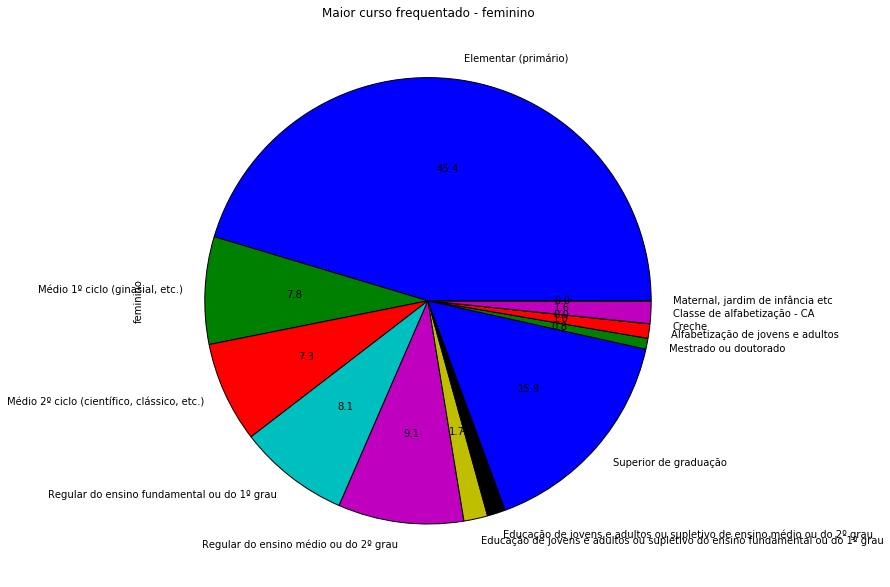

In [15]:
ct3 = ct.iloc[:13,1]

plot = ct3.plot(kind='pie',title='Maior curso frequentado - feminino',autopct='%.1f',figsize=(10, 10)) 

Ademais as mulheres aposentadas estudaram mais tempo que os homens como mostra a tabela abaixo, comprovando o ponto anterior.

In [16]:
ct3 = pd.crosstab(dados.anos_estudo,dados.sexo[dados.aposentados == 2],margins=True)

ct3.columns = ct.columns

ct3.index = ['menos que 1 ano',
'1 ano',
'2 anos',
'3 anos',
'4 anos',
'5 anos',
'6 anos',
'7 anos',
'8 anos',
'9 anos',
'10 anos',
'11 anos',
'12 anos',
'13 anos',
'14 anos',
'15 anos',
'não determinado',
'All']

ct3

,masculino,feminino,All
menos que 1 ano,4725,5102,69239
1 ano,685,685,10739
2 anos,1080,1113,13643
3 anos,1254,1316,16182
4 anos,3160,2857,29638
5 anos,1073,1076,20562
6 anos,529,424,14240
7 anos,304,245,14389
8 anos,1505,1290,30708
9 anos,121,102,11589


Porem como podemos ver no gráfico de setores abaixo existem mais homens aposentados que sabem ler e escrever que mulheres,que esta relacionado a tabela de quanto tempo cada genero estudou, existem mais mulheres que estudaram pouco tempo que homem,portanto não sabem ler ou escrever, esse fato explica o gráfico de setores abaixo

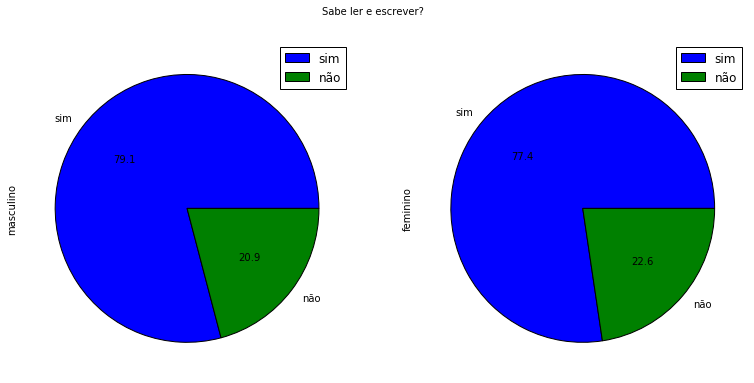

In [17]:

ct4 = pd.crosstab(dados.sabe_ler_escrever,dados.sexo[dados.aposentados == 2],margins=True)





ct4.columns = ['masculino',
'feminino',
'All']

ct4.index = ['sim',
'não',
'All']

ct4 = ct4.iloc[:2,0:2]

plot = ct4.plot(kind='pie',title='Sabe ler e escrever?',autopct='%.1f',figsize=(13, 6),subplots=True)

___
## Conclusão 

Assim como podemos ver existe uma difrença siginificativa entre os aposentados masculinos e femininos, esse trabalho mostra que os aposentados no seu tempo de trabalho não foram tratados de maneira igulitária.